# Import and install libraries

In [ ]:
# Train the CNN Genre Classification Model#
# Last editted by Pu Zeng, 18/10/2023 #
# We only use a small portion of the original dataset, so the result is really bad compared with the report

In [ ]:
# Download data
!git clone https://github.com/Pu-Zeng/696-Milestone.git

Cloning into '696-Milestone'...
remote: Enumerating objects: 3012, done.
remote: Counting objects: 100% (3012/3012), done.
remote: Compressing objects: 100% (2528/2528), done.
remote: Total 3012 (delta 40), reused 3003 (delta 31), pack-reused 0
Receiving objects: 100% (3012/3012), 31.95 MiB | 15.85 MiB/s, done.
Resolving deltas: 100% (40/40), done.
Updating files: 100% (1777/1777), done.


In [ ]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from tqdm import tqdm
import gensim
import gensim.downloader as api
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
import gensim.downloader as api
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import numpy as np
ps = PorterStemmer()
nltk.download('stopwords')
STOPWORDS=stopwords.words('english')
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Load Glove model and load dataset

In [ ]:
model = api.load("glove-wiki-gigaword-50")

[==================================================] 100.0% 66.0/66.0MB downloaded


In [ ]:
with open('/content/696-Milestone/Toy_Dataset/Lyrics/mxm_dataset_train_cleaned_toy.txt', encoding='utf8') as f:
    lines = f.readlines()

In [ ]:
words = lines[17][1:].split(',')
lines = lines[17:]

# Transform the result into average embeddings

In [ ]:
res = []
for line in tqdm(lines[1:]):
    embedding = np.zeros(50)
    count = 0
    for word in line.split(',')[2:]:
        k,v = (int(x) for x in word.split(':'))
        w = ps.stem(words[k-1].lower())
        if (words[k-1].lower not in STOPWORDS) and (w in model.index_to_key):
            embedding += model[w]*v
            count+=v
    embedding = embedding/count
    res.append(embedding)

100%|██████████| 982/982 [01:01<00:00, 16.02it/s]


# TSNE and visualization

In [ ]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(np.array(res))
X_embedded.shape

(982, 2)

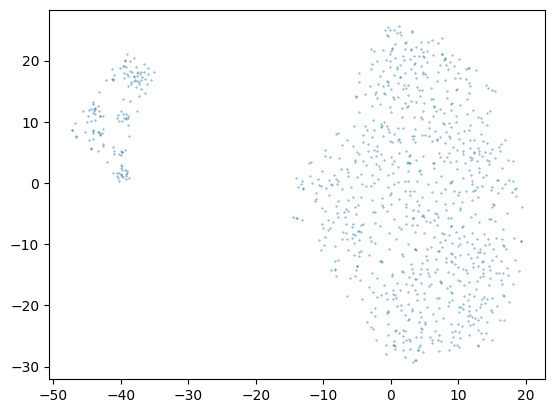

In [ ]:
plt.scatter(X_embedded[:, 0], X_embedded[:,1], s =.1)